# KNN 

# 1. Importing libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,plot_precision_recall_curve,plot_roc_curve,plot_confusion_matrix,confusion_matrix,accuracy_score,roc_curve, auc



# 2. Pre-processing of Data

## 2.1 Loading data 

In [45]:
# global Variables
random_state = 3 # random_state variable is chosen to be 3 for all algorithms to ensure fair comparison

In [46]:
df = pd.read_csv('data.csv',index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## 2.2 Splitting of data 

In [47]:
#splitting the data into features and labels
X = df.drop(['result'],axis=1)
y = df['result']



# Split into training and testing
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

# Split the training into training and validation 
X_cv, X_validate, y_cv, y_validate = train_test_split(X_cv, y_cv, test_size = 0.1, random_state = 55) 

X_cv = X_cv.reset_index(drop=True) 
X_validate = X_validate.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_cv = y_cv.reset_index(drop=True) 
y_validate = y_validate.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

## 2.3 Pipelining 

In [48]:
# pipelining both standardScalar and KNN model
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

## 2.4 Removing symptom6 column from our data 

In [49]:
# symptom6 attribute is has almost one identical value 

print(f"Number of rows: {len(df['symptom6'])}")
counter_1 = 0
counter_2 = 0
for i in range(len(df['symptom6'])):
  if df['symptom6'][i] == 1:
    counter_1 = counter_1 + 1
  else:
    counter_2 = counter_2 + 1
print(f"Number of cases with first value: {counter_1}")
print(f"Number of cases with Second value: {counter_2}")
df.drop(axis = 1, labels = 'symptom6', inplace = True)


Number of rows: 863
Number of cases with first value: 862
Number of cases with Second value: 1


# 3. Finding optimal K using GridSearchCV

## 3.1 GridSearchCV

In [50]:
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

## 3.2 Parameters of the classifier

In [51]:
# Find the best K regarding accuracy score
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## 3.3 Mean test score results

In [52]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.91143226, 0.90821935, 0.90984516, 0.90504516, 0.92596129,
       0.90501935, 0.91790968, 0.89858065, 0.90501935, 0.89858065,
       0.89856774, 0.89372903, 0.89534194, 0.89050323, 0.89534194,
       0.88889032, 0.89211613, 0.88566452, 0.88889032, 0.87923871,
       0.88566452, 0.88083871, 0.88083871, 0.87923871, 0.88083871,
       0.87923871, 0.88083871, 0.87923871, 0.87923871])

## 3.4 Accuracy vs K graph 

Text(0, 0.5, 'Accuracy')

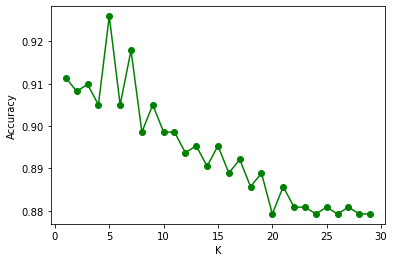

In [53]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'og-')
plt.xlabel("K")
plt.ylabel("Accuracy")


# 4. Testing the model

## 4.1 Predicitons of the classifer and confusion matrix 

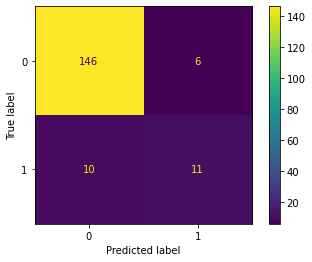

In [54]:
pred = full_cv_classifier.predict(X_test)
plot_confusion_matrix(full_cv_classifier,X_test,y_test)

In [55]:
accuracy_score(y_test,pred)

0.9075144508670521

# 5. Model Performance

## 5.1 Precision, Recall, F1-score

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       152
           1       0.65      0.52      0.58        21

    accuracy                           0.91       173
   macro avg       0.79      0.74      0.76       173
weighted avg       0.90      0.91      0.90       173



## 5.1 ROC_ AUC Cruves 

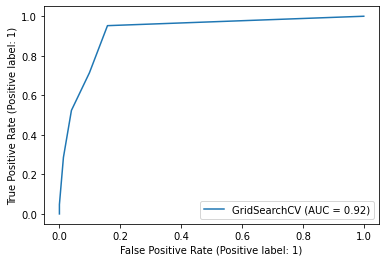

In [57]:
plot_roc_curve(full_cv_classifier,X_test,y_test)